In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm.notebook as tqdm
from scipy.stats import norm

In [ ]:
umaxs = [0.5, 0.1, 0.05, 0.01, 0.005, 0.001]

# Dynamic Pricing Using UCB1-P

In [ ]:
def get_mean(u_max, price):
    return u_max*(1-(0.8*(norm.cdf(price,0.85,0.38**0.5)-norm.cdf(0,0.85,0.38**0.5))+0.2*(norm.cdf(price,3.4,0.05**0.5)-norm.cdf(0,3.4,0.05**0.5))))

In [ ]:
def ucbp(time, umax, price, arms=4):
    # assert(price.shape==(1,arms))  
    means = get_mean(umax, price)
    ucb_t = np.zeros(arms)
    X = np.zeros(arms)
    first_term = 0
    reward = 0
    regret = np.zeros(time)
    revenue = np.zeros(time)
    count = 0    
    num_turns = np.ones(arms)
    for i in range(arms):
        X[i] = np.random.binomial(1, means[i], 1)
        revenue[i]=X[i]*price[i]
        reward += revenue[i]
        regret[i] = -1*reward
        ucb_t[i] = X[i] + np.sqrt(4*umax*np.log(i+1))
        
    for t in tqdm.tqdm(range(arms, time)):
        arm = 0;
        arm = np.argmax(ucb_t*price)
        
        reward_t = np.random.binomial(1, means[arm], 1)
        revenue[t]=reward_t*price[arm]
        reward += revenue[t]
        num_turns[arm] = num_turns[arm] + 1
        X[arm] = X[arm]*(1.0-1.0/(num_turns[arm])) + reward_t/num_turns[arm]
        
        ucb_t[arm] = X[arm] + np.sqrt(4*umax*np.log(t+1)/num_turns[arm])
        regret[t] = -1*reward
    regret = regret + np.arange(1, time+1)*np.max(price*means)
    return regret, X 

In [ ]:
umax=0.01
price=np.array([1,2,3,4])
time=2000000
arms=4
regret, X=ucbp(time, umax, price, arms)
# price.shape

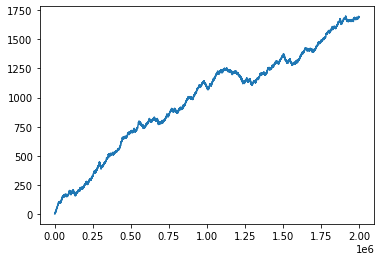

In [ ]:
plt.figure()
plt.plot(regret)
plt.show()

# Dynamic Pricing Using UCB1-O

In [ ]:
def ucbo(time, umax, price, arms=4):
    # assert(price.shape==(1,arms))  
    means = get_mean(umax, price)
    arm_reward = np.zeros(arms) # remember to update
    ucb_t = np.zeros(arms)
    X = np.zeros((arms,arms))
    T = np.zeros((arms,arms))
    UCB = time*np.ones(arms)
    first_term = 0
    reward = 0
    regret = np.zeros(time)
    revenue = np.zeros(time)
    count = 0    
    num_turns = np.ones(arms)
    for i in range(arms):
        reward_t = np.random.binomial(1, means[i], 1)
        arm_reward[i] += reward_t
        revenue[i]=reward_t*price[i]
        reward += revenue[i]
        regret[i] = -1*reward
        
    for t in tqdm.tqdm(range(arms, time)):
        T = np.ones((arms,arms))
        X = np.zeros((arms,arms))
        UCB = time*np.ones(arms)
        for i in range(arms):
            T[i,i] = num_turns[i]
            X[i,i] = arm_reward[i]/T[i,i]
            for j in reversed(range(i)):
                T[i,j] = T[i,j+1] + num_turns[j]
                X[i,j] = (X[i,j+1]*T[i,j+1] + arm_reward[j])/T[i,j]
            temp = X[i,:] + np.sqrt(2*np.log(t+1)/T[i,:])
            temp.reshape((arms,))
            UCB[i] = min(temp[0:i+1])
        arm = 0;
        arm = np.argmax(UCB*price)

        reward_t = np.random.binomial(1, means[arm], 1)
        arm_reward[arm] += reward_t
        revenue[t]=reward_t*price[arm]
        reward += revenue[t]
        num_turns[arm] = num_turns[arm] + 1
        regret[t] = -1*reward
    regret = regret + np.arange(1, time+1)*np.max(price*means)
    return regret, X 

In [ ]:
umax=0.01
price=np.array([1,2,3,4])
time=2000000
arms=4
regret, X = ucbo(time, umax, price, arms)

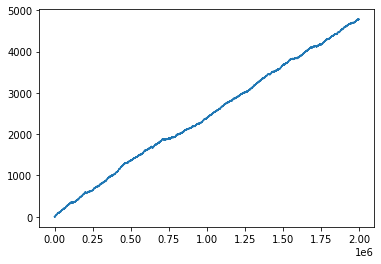

In [ ]:
plt.figure()
plt.plot(regret)
plt.show()

In [ ]:
def ucbpo(time, umax, price, arms=4):
    # assert(price.shape==(1,arms))  
    means = get_mean(umax, price)
    arm_reward = np.zeros(arms) # remember to update
    ucb_t = np.zeros(arms)
    X = np.zeros((arms,arms))
    T = np.zeros((arms,arms))
    UCB = time*np.ones(arms)
    first_term = 0
    reward = 0
    regret = np.zeros(time)
    revenue = np.zeros(time)
    count = 0    
    num_turns = np.ones(arms)
    for i in range(arms):
        reward_t = np.random.binomial(1, means[i], 1)
        arm_reward[i] += reward_t
        revenue[i]=reward_t*price[i]
        reward += revenue[i]
        regret[i] = -1*reward
        
    for t in tqdm.tqdm(range(arms, time)):
        T = np.ones((arms,arms))
        X = np.zeros((arms,arms))
        UCB = time*np.ones(arms)
        for i in range(arms):
            T[i,i] = num_turns[i]
            X[i,i] = arm_reward[i]/T[i,i]
            for j in reversed(range(i)):
                T[i,j] = T[i,j+1] + num_turns[j]
                X[i,j] = (X[i,j+1]*T[i,j+1] + arm_reward[j])/T[i,j]
            temp = X[i,:] + np.sqrt(4*umax*np.log(t+1)/T[i,:])
            temp.reshape((arms,))
            UCB[i] = min(temp[0:i+1])
        arm = 0;
        arm = np.argmax(UCB*price)

        reward_t = np.random.binomial(1, means[arm], 1)
        arm_reward[arm] += reward_t
        revenue[t]=reward_t*price[arm]
        reward += revenue[t]
        num_turns[arm] = num_turns[arm] + 1
        regret[t] = -1*reward
    regret = regret + np.arange(1, time+1)*np.max(price*means)
    return regret, X 

In [ ]:
umax=0.01
price=np.array([1,2,3,4])
time=2000000
arms=4
regret, X = ucbpo(time, umax, price, arms)

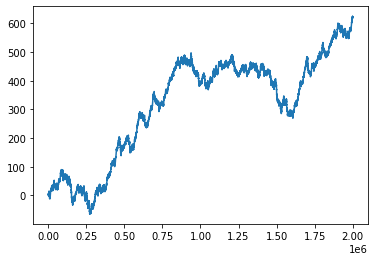

In [ ]:
plt.figure()
plt.plot(regret)
plt.show()

In [ ]:
state_dict = {}
price=np.array([1,2,3,4])
time=2000000
arms=4
udict1 = {}
udict2 = {}
udict3 = {}
for umax in tqdm.tqdm(umaxs):
    regret, X = ucbp(time, umax, price, arms)
    udict1[umax] = regret

    regret, X = ucbo(time, umax, price, arms)
    udict2[umax] = regret
    
    regret, X = ucbpo(time, umax, price, arms)
    udict3[umax] = regret

state_dict["ucbp"] = udict1
state_dict["ucbo"] = udict2
state_dict["ucbpo"] = udict3

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


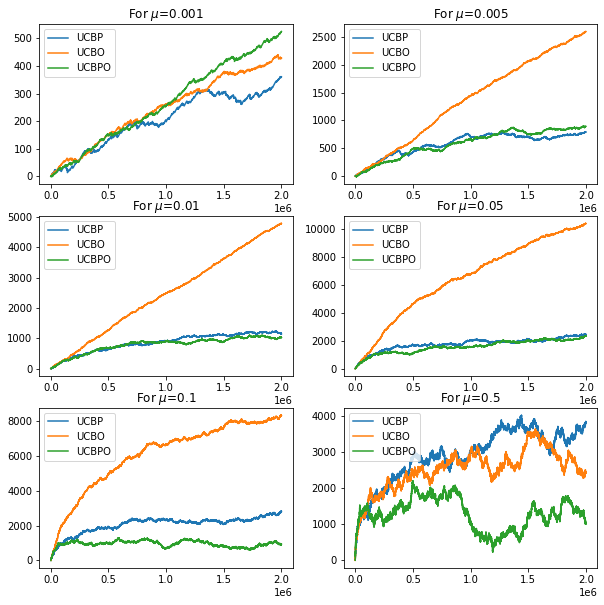

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(321)
plt.title("For $\mu$={}".format(0.001))
plt.plot(state_dict["ucbp"][0.001])
plt.plot(state_dict["ucbo"][0.001])
plt.plot(state_dict["ucbpo"][0.001])
plt.legend(["UCBP", "UCBO", "UCBPO"])
plt.subplot(322)
plt.title("For $\mu$={}".format(0.005))
plt.plot(state_dict["ucbp"][0.005])
plt.plot(state_dict["ucbo"][0.005])
plt.plot(state_dict["ucbpo"][0.005])
plt.legend(["UCBP", "UCBO", "UCBPO"])
plt.subplot(323)
plt.title("For $\mu$={}".format(0.01))
plt.plot(state_dict["ucbp"][0.01])
plt.plot(state_dict["ucbo"][0.01])
plt.plot(state_dict["ucbpo"][0.01])
plt.legend(["UCBP", "UCBO", "UCBPO"])
plt.subplot(324)
plt.title("For $\mu$={}".format(0.05))
plt.plot(state_dict["ucbp"][0.05])
plt.plot(state_dict["ucbo"][0.05])
plt.plot(state_dict["ucbpo"][0.05])
plt.legend(["UCBP", "UCBO", "UCBPO"])
plt.subplot(325)
plt.title("For $\mu$={}".format(0.1))
plt.plot(state_dict["ucbp"][0.1])
plt.plot(state_dict["ucbo"][0.1])
plt.plot(state_dict["ucbpo"][0.1])
plt.legend(["UCBP", "UCBO", "UCBPO"])
plt.subplot(326)
plt.title("For $\mu$={}".format(0.5))
plt.plot(state_dict["ucbp"][0.5])
plt.plot(state_dict["ucbo"][0.5])
plt.plot(state_dict["ucbpo"][0.5])
plt.legend(["UCBP", "UCBO", "UCBPO"])
plt.show()

In [ ]:
import pickle

In [ ]:
with open("dynamic_pricing", "wb") as dpfile:
    pickle.dump(state_dict, dpfile)

In [ ]:
read_file = open("dynamic_pricing", "rb")
new_dict = pickle.load(read_file)

In [ ]:
new_dict

{'ucbo': {0.001: array([7.80010357e-04, 1.56002071e-03, 2.34003107e-03, ...,
         4.28019154e+02, 4.28019934e+02, 4.28020714e+02]),
  0.005: array([3.90005178e-03, 7.80010357e-03, 1.17001554e-02, ...,
         2.59609577e+03, 2.59609967e+03, 2.59610357e+03]),
  0.01: array([7.80010357e-03, 1.56002071e-02, 2.34003107e-02, ...,
         4.78119154e+03, 4.78119934e+03, 4.78120714e+03]),
  0.05: array([3.90005178e-02, 7.80010357e-02, 1.17001554e-01, ...,
         1.04019577e+04, 1.04019967e+04, 1.04020357e+04]),
  0.1: array([7.80010357e-02, 1.56002071e-01, 2.34003107e-01, ...,
         8.32691539e+03, 8.32699339e+03, 8.32707139e+03]),
  0.5: array([3.90005178e-01, 7.80010357e-01, 1.17001554e+00, ...,
         2.45657696e+03, 2.45696696e+03, 2.45735697e+03])},
 'ucbp': {0.001: array([7.80010357e-04, 1.56002071e-03, 2.34003107e-03, ...,
         3.60019154e+02, 3.60019934e+02, 3.60020714e+02]),
  0.005: array([3.90005178e-03, 7.80010357e-03, 1.17001554e-02, ...,
         7.90095770e+02,